# 양자 위상 추정

양자 위상 추정은 양자 계산에서 가장 유명한 서브루틴 중 하나입니다. 이는 많은 양자 알고리즘에서 중심적인 역할을 합니다. 해당 알고리즘의 목표는 다음과 같습니다:

유니타리 행렬 $U$가 주어지면, 양자 위상 추정 알고리즘은 $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$에서 $\theta$를 추정합니다. 여기서 $|\psi\rangle$는 고유벡터이고 $e^{\boldsymbol{2\pi i}\theta}$는 그에 대한 고윳값입니다. $U$가 유니타리이기 때문에, 모든 고윳값의 크기는 1입니다.

## 1. 개요 <a id="overview"></a>

위상 추정을 위한 일반적인 양자 회로는 아래에 나와 있습니다. 상단의 레지스터는 $t$개의 '카운팅' 큐비트를 포함하고, 하단의 레지스터는 상태 $|\psi\rangle$: ![image1](images/qpe_tex_qz.png)의 큐비트를 포함합니다.


### 1.1 직관 얻기 <a id="intuition"></a>

양자 위상 추정 알고리즘은 (푸리에 기저 안에서) $U$의 위상을 $t$개의 카운팅 레지스터에 기록하기 위해 위상 반동을 이용합니다. 그 다음 이를 푸리에 기저에서 측정할 수 있는 계산 기저로 변환하기 위해 양자 푸리에 역변환을 사용합니다.

QFT를 배웠던 장에서, 우리는 푸리에 기저 내 최상단 큐비트는 $0$ and $2^t$까지 셈을 하게 되면 완전한 한 바퀴를 회전하게 된다는 것을 기억하고 있습니다. $0$와 $2^t$ 사이에 있는 숫자 $x$를 셈하기 위해서, 우리는 이 큐비트를  z축 주위로 $\tfrac{x}{2^t}$만큼 회전 시킵니다. 그 다음 큐비트는 $\tfrac{2x}{2^t}$, 그리고 세 번째 큐비트는 $\tfrac{4x}{2^t}$ 만큼 회전 시킵니다.

![image2](images/qpe_intuition.jpg)

$U$-게이트를 제어하는 큐비트를 사용할 때, 해당 큐비트는 (반동 때문에) 위상 $e^{2i\pi\theta}$에 비례하여 회전하게 됩니다. 위상 $\theta$가 푸리에 기저 내에서 $0$와 $2^t$ 사이의 숫자로 변환 될 때까지 적당한 횟수만큼 해당 회전을 반복하는 연속된 $CU$-게이트를 사용할 수 있습니다.

그 다음 이를 계산 기저로 바꾸는 $QFT^\dagger$를 간단하게 사용합니다.


### 1.2 수학적인 기반 <a id="maths"></a>

앞서 말했듯, 이 회로는 유니타리 연산자 $U$의 위상을 추정합니다. 이 회로는 $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$에 있는 $\theta$를 추정하며, 여기서 $|\psi\rangle$는 고유벡터이고 $e^{\boldsymbol{2\pi i}\theta}$는 그에 해당하는 고윳값입니다. 이 회로는 다음의 단계들을 따라서 작동합니다:

i. **준비**: $\vert\psi\rangle$는 큐비트 레지스터들의 모음입니다. 추가적인 $n$ 큐비트 집합은 $2^n\theta$ 값을 저장할 셈(counting) 레지스터를 구성합니다.

```
$$ |\psi_0\rangle = \lvert 0 \rangle^{\otimes n} \lvert \psi \rangle$$
```

ii. **중첩**: $n$-비트 하다마드 게이트 연산 $H^{\otimes n}$를 셈 레지스터에 작용합니다:

```
$$ |\psi_1\rangle = {\frac {1}{2^{\frac {n}{2}}}}\left(|0\rangle +|1\rangle \right)^{\otimes n} \lvert \psi \rangle$$
```

iii. **제어 유니타리 연산**: 제어 비트가 $|1\rangle$일 때에만 대상 큐비트에 유니타리 연산자 $U$를 적용하는 제어 유니터리 $CU$를 도입합니다. $U$가 $U|\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$인 고유벡터 $|\psi\rangle$를 갖는 유니타리 연산자이기 때문에 이는 다음을 의미합니다:

```
$$U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle$$
```

$0\leq j\leq n-1$인 모든 $n$ 제어 연산 $CU^{2^j}$를 적용하고 $|0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i\theta }|\psi \rangle =\left(|0\rangle +e^{2\pi i\theta }|1\rangle \right)\otimes |\psi \rangle$ 관계를 이용하면:

\begin{aligned} |\psi_{2}\rangle &amp; =\frac {1}{2^{\frac {n}{2}}} \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{n-1}}}|1\rangle \right) \otimes \cdots \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{1}}}\vert1\rangle \right) \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{0}}}\vert1\rangle \right) \otimes |\psi\rangle\\ &amp; = \frac{1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes \vert\psi\rangle \end{aligned} 이며 여기서 $k$는 n비트 이진수의 정수 표현을 나타냅니다.

iv. **푸리에 역변환**: 위의 표현식이 이전에 [양자 푸리에 변환 및 Qiskit 구현](/course/ch-algorithms/quantum-fourier-transform)의 노트북에서 유도했던 양자 푸리에 변환의 적용 결과와 정확히 같음에 주목하십시오. 양자 푸리에 변환은 n-큐비트 입력 상태 $\vert x\rangle$를 다음과 같은 출력으로 대응시킨다는 것을 기억하십시오.

$$
QFT\vert x \rangle = \frac{1}{2^\frac{n}{2}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right)
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right)
\otimes
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right)
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right)
$$

위의 표현식에서 $x$를 $2^n\theta$로 교체하면 정확히 위의 2단계에서 유도한 표현식이 됩니다. 그러므로, $\vert2^n\theta\rangle$ 상태를 복원하려면, 푸리에 역변환을 보조 레지스터에 적용하십시오. 그렇게 함으로써 우리는 다음을 얻습니다.

$$
\vert\psi_3\rangle = \frac {1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes | \psi \rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1} e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)} |x\rangle \otimes |\psi\rangle
$$

v. **측정**: 위의 식은 $x = 2^n\theta$ 근처에서 최고점을 갖습니다. $2^n\theta$가 정수인 경우에 대해서, 계산 기저에서 측정하는 것은 높은 확률로 보조 레지스터에 있는 위상을 제공합니다:

```
$$ |\psi_4\rangle = | 2^n \theta \rangle \otimes | \psi \rangle$$
```

$2^n\theta$가 정수가 아닌 경우에 대해서도, 여전히 위의 식이 $x = 2^n\theta$ 근처에서 $4/\pi^2 \approx 40%$ 이상의 확률로 최고점을 갖는 것을 보일 수 있습니다.

## 2. 예제: T-gate <a id="example_t_gate"></a>

우리가 잘 알고 있는 게이트, $T$-gate를 갖고서 양자 위상 추정을 사용하여 이 게이트의 위상을 추정해봅시다. $T$-gate가 $e^\frac{i\pi}{4}$의 위상을 상태 $|1\rangle$에 더한다는 것을 기억할 수 있을 것입니다:

$$ T|1\rangle =
\begin{bmatrix}
1 &amp; 0\\
0 &amp; e^\frac{i\pi}{4}\\
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
= e^\frac{i\pi}{4}|1\rangle $$

QPE가 다음과 같은 $\theta$를 줄 것이기 때문에:

```
$$ T|1\rangle = e^{2i\pi\theta}|1\rangle $$
```

우리는 다음을 찾기를 기대합니다:

```
$$\theta = \frac{1}{8}$$
```

이 예제에서 우리는 세 개의 큐비트를 사용하고 추정치가 아닌 *정확한* 결과를 구할 것입니다.

### 2.1 회로 생성하기 <a id="creating_the_circuit"></a>

우선 우리의 환경을 준비해봅시다:

In [1]:
#초기화
import matplotlib.pyplot as plt
import numpy as np
import math

# Qiskit 불러오기
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# 기본적인 그래프 도구와 회로를 불러오기
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

이제, 양자 회로를 설정하세요. 우리는 4개의 큐비트를 사용하겠습니다 -- 큐비트 0부터 2는 셈(counting) 큐비트, 그리고 큐비트 3은 유니타리 연산자($T$)의 고유상태입니다.

$X$ 게이트를 적용하여 $\vert\psi\rangle = \vert1\rangle$ 를 초기화합니다.

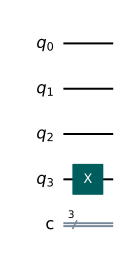

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

그 다음, 하다마드 게이트를 셈 큐비트에 작용합니다:

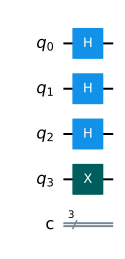

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

다음으로 제어 유니타리 연산을 수행합니다.

Qiskit의 [`PhaseGate`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html)를 사용하여 $T$ 연산을 생성합니다. 위상 게이트는  $P|1\rangle = e^{i\lambda}|1\rangle$ 변환을 수행합니다. 여기서 $\lambda$는 사용자가 입력하는 각도 입니다. $T|1\rangle = e^{2\pi i \theta}|1\rangle$를 수행하는 $T$를 구현하려면 $\lambda = \tfrac{2 \pi}{8} = \pi/4$로 설정해야 합니다.

또한 Qiskit은 개요에 있는 회로도와 반대 방향으로 큐비트를 정렬한다는 것을 기억하십시오.

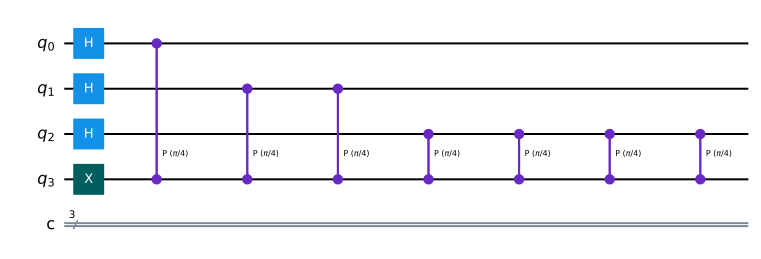

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2
qpe.draw()

우리는 셈 레지스터의 상태를 변환하기 위해서 푸리에 역변환을 적용하고 나서 셈 레지스터를 측정합니다:

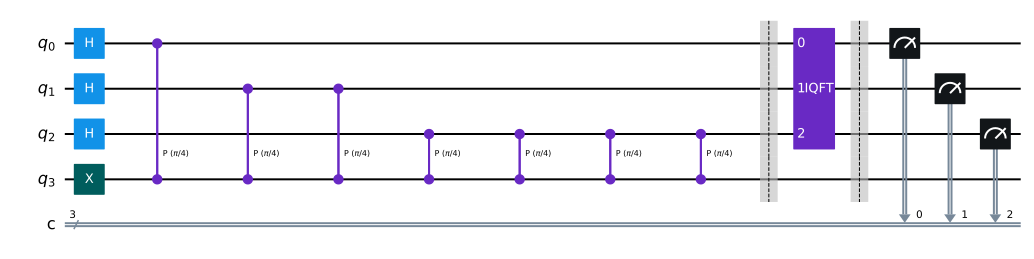

In [5]:
qpe.barrier()
# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw()

### 2.2 결과 <a id="results"></a>

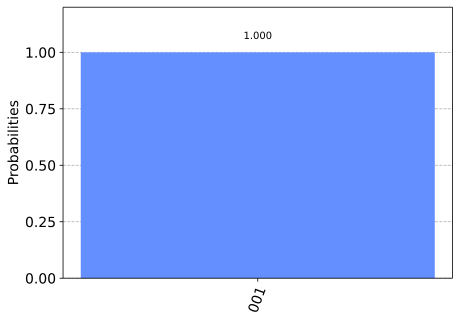

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

확실하게 한 개의 결과(`001`)를 확인할 수 있습니다. 이 결과를 10진수로 변환하면 1입니다. 이제 $\theta$를 얻기 위해서 결과값 (`1`)을 $2^n$으로 나누어야 합니다.

```
$$ \theta = \frac{1}{2^3} = \frac{1}{8} $$
```

이는 정확히 우리가 예상했던 결과입니다!

## 3. 예제: 더 높은 정확도 얻기 <a id="getting_more_precision"></a>

### 3.1 문제 <a id="the_problem"></a>

$T$ 게이트 대신에 $\theta = \frac{1}{3}$인 게이트를 사용해봅시다.

아래 셀에서 이전 예제와 같은 회로를 구성합니다.

$P|1\rangle = e^{i\lambda}|1\rangle$을 수행하는 Qiskit의 [`PhaseGate`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html)를 다시 사용합니다. $U|1\rangle = e^{2\pi i \tfrac{1}{3}}|1\rangle$를 구현하려면 $\lambda = \tfrac{2 \pi}{3}$를 설정해야합니다.

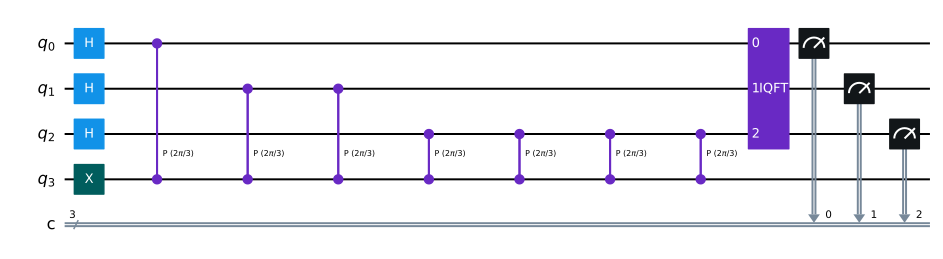

In [7]:
# 회로를 생성하고 설정하세요
qpe2 = QuantumCircuit(4, 3)

# 카운팅 큐비트에 H 게이트를 작용하세요:
Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# 고유 상태를 |psi> 준비하세요:
qpe2.x(3)

# 제어-U 연산을 수행하세요:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# 역 QFT를 수행하세요:
qpe2 = qpe2.compose(QFT(3, inverse=True), [0,1,2])

# 측정도 물론 하세요!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

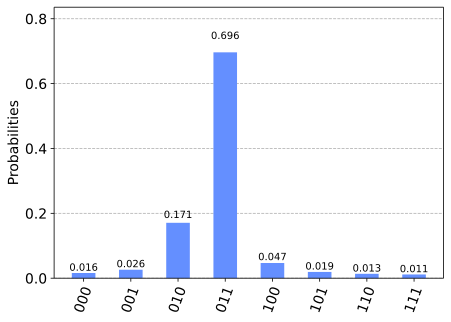

In [8]:
# 결과를 봅시다!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

$\theta = 0.3333\dots$ 결과를 예상했으며 가장  가능성이 높은 결과는 `010(bin) = 2(dec)` 와 `011(bin) = 3(dec)` 입니다. 이 두 결과는 각각 $\theta = 0.25$ (25%) 및 $\theta = 0.375$ (13%) 입니다. $\theta$의 참값은 셈 비트에서 구할 수 있는 값 사이에 있으며 이 값은 불확실하고 부정확합니다.

### 3.2 해법 <a id="the_solution"></a>

정밀도를 높이려면 셈 큐비트를 늘리면 됩니다. 두 개의 셈 큐비트를 추가할 것입니다.

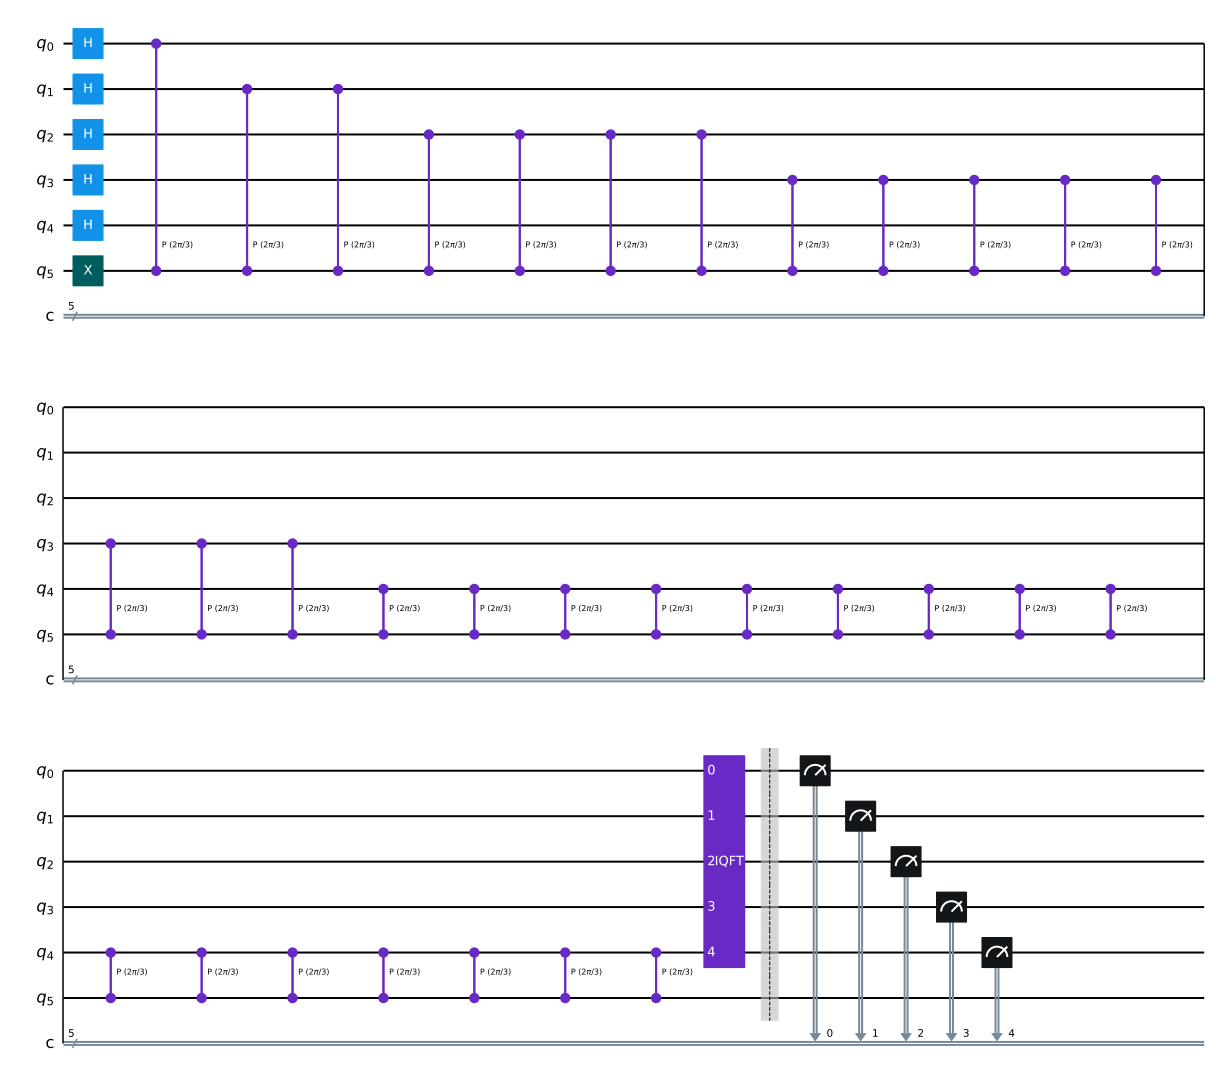

In [9]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qpe3 = qpe3.compose(QFT(5, inverse=True), range(5))

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

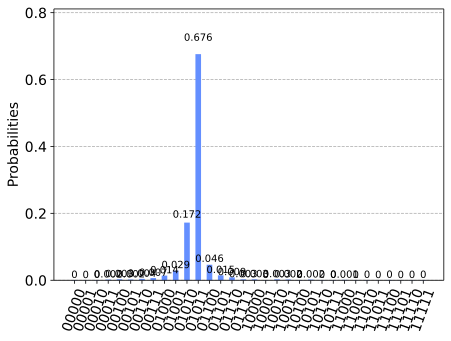

In [10]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

가장 가능성이 높은 두 가지 측정값은 이제 `01011` (십진수 11) 과`01010` (십진수 10)입니다. 이 결과를 측정하면 $\theta$가 다음과 같다는 것을 알 수 있습니다.

$$
\theta = \frac{11}{2^5} = 0.344,\;\text{  or  }\;\; \theta = \frac{10}{2^5} = 0.313
$$

이 두 결과는 참값인 $\frac{1}{3}$에 대해 각각 3% 와 6% 만큼 차이가 납니다. 더 정밀합니다!

## 4. 실제 장치를 이용한 실험 <a id="real_devices"></a>

### 4.1 2.1절의 회로 <a id="circuit_2.1"></a>

2.1 절의 회로를 실제 장치에서 실행할 수 있습니다. 회로를 다시 한번 살펴보겠습니다.

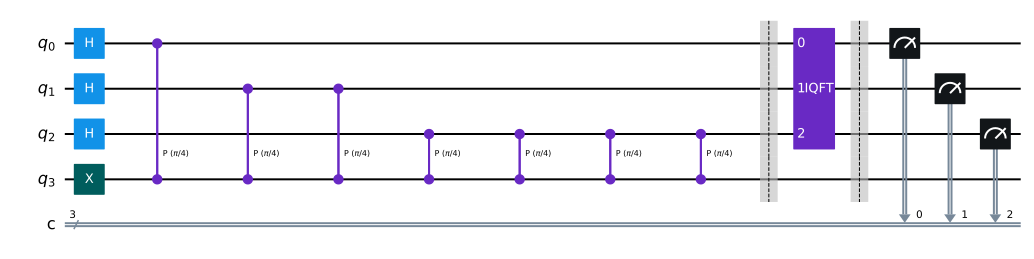

In [11]:
qpe.draw()

In [12]:
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [13]:
# Run with 2048 shots
shots = 2048
t_qpe = transpile(qpe, backend, optimization_level=3)
job = backend.run(t_qpe, shots=shots)
job_monitor(job)

Job Status: job has successfully run


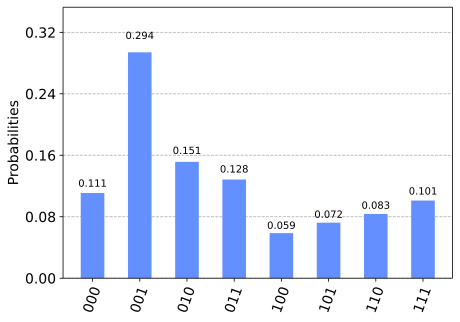

In [14]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)

다행히도 가장 가능성이 높은 결과는 시뮬레이터에서 예상 했듯이 `001`임을 알 수 있습니다. 시뮬레이터와 달리 `001` 이외의 것을 측정할 확률이 있는데 이는 양자 컴퓨터의 잡음과 게이트 오류로 인한 것입니다.

## 5. 연습문제 <a id="exercises"></a>

1. 다른 게이트 ($\text{CNOT}$, Controlled-$S$, Controlled-$T^\dagger$)에 대해 위의 실험을 시도해 보세요. 어떤 결과가 예상하십니까? 어떤 결과를 얻습니까?

2. 제어 $Y$ 게이트로 실험을 해보십시오. 예상한 결과를 얻습니까? (힌트: $|\psi\rangle$이 $Y$의 고유 상태인지 확인해야 합니다!)


## 6. 기대하며 <a id="looking_forward"></a>

양자 컴퓨터에서 제어 $U$ 연산을 하려면 $\theta$를 알아야 하기 때문에 양자 위상 추정 알고리즘은 무의미해 보일 수 있습니다. 이후 장에서 $\theta$를 모르는 회로를 만들 수 있으며 $\theta$ 학습이 매우 유용한 것을 알려줄 수 있다는 것을 알게 될 것 입니다. (가장 유명한 것은 인수분해 하는 방법입니다!)

## 7. 참고문헌 <a id="references"></a>

[1] Michael A. Nielsen and Isaac L. Chuang. 2011. Quantum Computation and Quantum Information: 10th Anniversary Edition (10th ed.). Cambridge University Press, New York, NY, USA. 

## 8. 기여 <a id="contributors"></a>

03/20/2020 — Hwajung Kang (@HwajungKang) — Fixed inconsistencies with qubit ordering

In [15]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
